## Introduction to Huggingface

[Huggingface](https://huggingface.co/) is one of the most popular library for Natural Language Processing (NLP). It has revolutionized the field of Artificial Intelligence(AI) by providing a platform through which anyone can access the latest models in each of the domain like Computer vision, Natural Language Processing, Audio, etc.


### Why it's one of the most popular platform?

Before Huggingface, research in NLP was conducted in silos, and it was difficult for the community to access any of the latest models from the [hub](https://huggingface.co/models). Therefore, Huggingface has **democratized the research by giving users direct access to state-of-the-art models**. With its simple and intuitive API, Huggingface has made it easier than ever for researchers and developers to incorporate NLP models into their applications.
Using its platform, you can easily download any model, fine-tune it, and create models for your custom task.


### What's this notebook about?
One of the most disruptive and innovative architecture in NLP is Transformer. A type of neural network architecture that has achieved state-of-the-art performance in many NLP tasks. Huggingface provides pre-trained transformer models that can be fine-tuned on specific tasks, as well as tools for training custom transformer models from scratch.


**Learning Objectives**:
> In this notebook:
1. You will explore the different features and functionalities of the Huggingface library.
2. You will look into the different pipelines and demonstrate how to use them for NLP tasks like sentiment analysis, text generation & named entity recognition.
3. You will learn how to load a pre-trained transformer model to perform any NLP task.
4. You will dissect the pipeline feature of Huggingface and customise it to process any input sentence.


*So let's start our journey

## Task 0: Installing the transformers

To use Huggingface, you need to install the transformers library. You can do this by running the following command in your Colab notebook:

In [ ]:
!pip install transformers

In [ ]:
!pip install tensorflow

In [ ]:
pip install tf-keras

This will install the latest version of the library.

## **Task 1: Pipelines**
Huggingface provides a high-level API called **pipelines** that makes it easy to perform a variety of NLP tasks with just a few lines of code.

Pipelines are objects that encapsulate all the necessary preprocessing, tokenization, and model inference steps for a given task, so you don't have to worry about the implementation details.

 **Available Pipelines**:

Huggingface provides a variety of pipelines for different NLP tasks. Here are some of the most commonly used ones:

* text-generation: Generates text based on a given prompt.
* text-classification: Classifies text into one or more categories.
* question-answering: Answers questions based on a given context.
* summarization: Summarizes a piece of text.
* translation: Translates text from one language to another.
* fill-mask : Predict the masked word based on the context of the sentence.
* ner: Recognizes named entities in a piece of text.




### **Task 1.1: Text classification using pipeline**

So now that you have seen what all pipelines we can use, let's go ahead and see an example of how to use the text classification pipeline:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from transformers import pipeline

# To perform a specific NLP task, you can simply create a pipeline object and specify the task you want to perform.
classifier = pipeline('text-classification')
result = classifier('I am sad that India lost the cricket match!')
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.9989637136459351}]


#### Understanding the Output

The output shows that the input sentence is classified as positive with a high score of 0.999.

The pipeline returns a list of dictionary for the input sequence. In this case, the dictionary contains a label and a score indicating the sentiment of the input text.



*Try playing with the input sentence to the classifier and observe the results.*




- You noticed that you don't have to specify the model, the pipeline object automatically downloads the model on observing the input sequence and the task you specified. That's the power of pipeline!

- You can observe that by default the pipeline object called the `distilbert-base-uncased-finetuned-sst-2-english` model for classifying the input sentence. But what does each of this term in the model name mean?
    - `DistilBERT`: It is a smaller and faster variant*(distilled variant)* of the popular BERT (Bidirectional Encoder Representations from Transformers) model, developed by Huggingface. DistilBERT is trained in the same way as BERT, but with fewer parameters, resulting in a smaller model that is faster and more efficient to use. Despite its smaller size, it still achieves good performance on a wide range of NLP tasks.

 *  *The name "distil" stands for "distillation", as the model was distilled from the larger and more complex models to be more lightweight and efficient, while still maintaining a high level of performance.*

  -  `uncased`: It refers to the fact that the model is trained on text that has been converted to lowercase, so it does not distinguish between words that appear in different case forms. For example, the words "Hello" and "hello" would be treated the same by the model.

  -  `fine-tuned`: It means that the model has been trained on a specific task (in this case, sentiment analysis on the **Stanford Sentiment Treebank (SST-2)** dataset) after being pre-trained on a large corpus of text. Fine-tuning allows the model to adapt to the specific task it is being used for and improve its performance on that task.

You can pass in multiple sentences to do the same task of Text Classification:

In [ ]:
# List of input sentences
input_sentences = [
    "I don't like this movie",
    "University is helping me learn new and wonderful things.",
]

# Creating a pipeline object for sentiment analysis
classifier = pipeline("text-classification")

# Performing sentiment analysis on the input sentences
result = classifier(input_sentences)

# Printing the results
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9839023947715759}, {'label': 'POSITIVE', 'score': 0.9998769760131836}]


You can observe from the results that:
* For the first sentence, the model returns **Negative sentiment** with a high score of 98%
* For the second sentence, the model returns **Positive sentiment** with a high score of 99%

#### **Task 1.1.1: Load a pre-trained transformer model**

The pipeline automatically selects the best model based on the defined NLP task and input sentence. However, there are situations where you may want to use a specific pre-trained model for your task.

For example, you may have previously fine-tuned a model for a specific task and want to use that same model for inference.

In addition, there may be cases where the pipeline's default model selection may not be the best option for your specific use case. In such cases, you can specify the model name to use a specific pre-trained model instead of relying on the pipeline's default model selection.

 Here's an example:


In [ ]:
# To use a pre-trained model for a specific NLP task, you can simply create a pipeline object, specify the task you want to perform & the model name you want to use.
classifier = pipeline('text-classification', model = "roberta-base") #pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions")
result = classifier('I love India!')
print(result)

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'label': 'LABEL_0', 'score': 0.5009933710098267}]


The model returned returns a list of dictionary with a poor score. But why?

The label **LABEL_1** is not specific to any particular sentiment. Rather, it is a general label that the model assigns to one of the possible classes for the sentiment classification task. In this case, it means that the model has classified the sentiment of the input sentence as negative or neutral, but not positive.

The reason why the score is low for the sentence **"I love India!"** when using the `roberta-base` model is likely due to the fact that this model was not specifically trained on the sentiment analysis task, unlike the `distilbert-base-uncased-finetuned-sst-2-english` model. The `roberta-base` model (a pre-trained RoBERTa model) is a general-purpose language model that can be fine-tuned on a variety of tasks, including sentiment analysis, but it may not perform as well as models that were specifically designed and trained for the sentiment analysis task.

### **Task 1.2: Text generation using pipeline**

We have learned how to classify text using pipeline, how about generating text? To do so, you have to rename the task inside the pipeline to `text-generation` and specify the model name (if required).

In [ ]:
# Creating a pipeline object for text generation with the "distilgpt2" model
generator = pipeline("text-generation", model="distilgpt2")

# Generating text starting with the given prompt
result = generator("In the galaxy far far away" )

# Printing the generated text
print(result)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In the galaxy far far away, so we can only see the galaxy far away, from the sky."\n\n\n\n"It\'s a bit more fun now, so you just can\'t imagine what would go into a galaxy far away," Kim'}]


Notice the output the model gave; it doesn't make much sense or human like. You can limit the output's length by passing additional arguments `max_length=30` as part of the generator input.

NOTE:  `distilgpt2` is a pre-trained language model based on the GPT-2 architecture, but with a smaller number of parameters.  The distilgpt2 model is particularly suitable for generating short and medium-length text sequences, such as headlines, captions, or tweets.

### **Task 1.3: Masked Entity Prediction using pipeline**

In Masked Language Modelling(MLM) or Masked Entity Prediction(MEP), the model is trained to predict a missing word in a given sentence where the word is replaced with a special token, usually `<mask>`.

In [ ]:
# Creating a pipeline object for masked language modeling
unmasker = pipeline("fill-mask")

# Generating predictions for the masked tokens in the input text
unmasker("You are going to <mask> about a wonderful library today.", top_k=2)

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'score': 0.5679106712341309,
  'token': 1798,
  'token_str': ' hear',
  'sequence': 'You are going to hear about a wonderful library today.'},
 {'score': 0.22818486392498016,
  'token': 1532,
  'token_str': ' learn',
  'sequence': 'You are going to learn about a wonderful library today.'}]

The output of the code provides a list of candidate words that could be used to replace the masked token in the input sentence. For each candidate word, the output also provides a score indicating the likelihood of that word being the correct replacement.

In this specific example, the top two(top_k = 2) candidate words for the masked token in the input sentence: **"You are going to <mask> about a wonderful library today."** are **"hear"** and **"learn"**.

The first candidate word "hear" has a higher score of **0.5679** compared to the second candidate word "learn", which has a score of **0.2281.**

NOTE: When we ran the code, it is observed that the default model used is `distilroberta-base`, which is a smaller and faster version of the RoBERTa model. This model is trained on a large corpus of text to predict the missing words in a sentence, and it performs well on various NLP tasks such as sentiment analysis, text classification, and more.

### **Task 1.4. Question Answering Task**

In [ ]:
# Load the question-answering pipeline
qa_pipeline = pipeline("question-answering")

# Define the question and context
question = "How is Izmir city?"
context = """
My name is Merve, and I have lived in several cities throughout my life. I was born in Ankara, the capital of Turkey,
where I spent my early childhood. Later, my family moved to İzmir, a beautiful city on the Aegean coast, known for its vibrant culture
and historical sites. After completing my high school education in İzmir, I decided to pursue my university studies in İstanbul. İstanbul,
a city that straddles two continents, Europe and Asia, has been my home ever since. It is a bustling metropolis with a rich history and
diverse population. I currently work as a software engineer in a tech company based in İstanbul, and I enjoy exploring the city's many
neighborhoods and landmarks during my free time.
"""

# Run the pipeline
result = qa_pipeline(question=question, context=context)

# Print the result
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.35624822974205017, 'start': 187, 'end': 223, 'answer': 'a beautiful city on the Aegean coast'}


In [ ]:
# Load the question-answering pipeline
qa_pipeline = pipeline("question-answering")

# Define the question and context
question = "What are the initial sources of funding for startups?"
context = """
Startups are nascent business entities founded by entrepreneurs with innovative ideas, often focusing on a unique product or service.
These companies typically begin with substantial expenses and limited revenue, necessitating external financial support.
Initial funding often comes from the founders' savings, family, and friends. As startups grow, they seek additional funding from
venture capitalists, angel investors, and crowdfunding platforms. Venture capitalists and angel investors provide seed money in
exchange for equity, helping startups to finance early steps like product development, market research, and marketing.
Silicon Valley is renowned for its robust venture capital ecosystem, making it a popular destination for startups.
Startups can also secure loans from banks or microloans from organizations like the U.S. Small Business Administration.
The funding process is divided into stages, including pre-seed, seed, Series A, B, and beyond, each catering to different
growth phases and financial needs. Successful startups often exhibit scalability, meaning they can expand operations with limited
additional investment. Despite the high risks, startups offer unique work environments and the potential for significant returns.
Entrepreneurs must navigate various challenges, including securing capital, developing a business model, and managing stress, to bring
their groundbreaking ideas to market.
"""

# Run the pipeline
result = qa_pipeline(question=question, context=context)

# Print the result
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.4373992085456848, 'start': 303, 'end': 331, 'answer': 'savings, family, and friends'}


In [ ]:
from transformers import pipeline

# Load the question-answering pipeline
qa_pipeline = pipeline("question-answering")

# Define the question and context
question = "What are electronic health records used for?"
context = """
The medical field is vast and complex, encompassing various specialties, treatments, and research areas. Medical professionals rely on accurate and up-to-date information to diagnose and treat patients effectively. One critical aspect of the medical domain is the use of electronic health records (EHRs), which store patient data, including medical history, diagnoses, medications, treatment plans, immunization dates, allergies, radiology images, and laboratory test results. EHRs facilitate the sharing of patient information among healthcare providers, improving the coordination of care and patient outcomes.

Medical research is another crucial component, with continuous advancements in understanding diseases, developing new treatments, and improving existing therapies. Clinical trials play a significant role in this process, testing the safety and efficacy of new drugs and medical devices. These trials are conducted in phases, starting with small groups of healthy volunteers and progressing to larger groups of patients. The results of clinical trials are published in medical journals and contribute to evidence-based medicine, guiding clinical practice.

Medical imaging is an essential diagnostic tool, including techniques such as X-rays, computed tomography (CT) scans, magnetic resonance imaging (MRI), and ultrasound. These imaging modalities help visualize the internal structures of the body, aiding in the diagnosis and monitoring of diseases. Radiologists, who specialize in interpreting medical images, play a vital role in patient care by providing accurate diagnoses and recommendations for further treatment.

In the realm of medical treatments, pharmaceuticals are a cornerstone. The development of new drugs involves extensive research and testing to ensure their safety and effectiveness. Pharmacology, the study of drugs and their effects on the body, is a critical field that informs the development and use of medications. Pharmacists, who are experts in medication management, work closely with healthcare providers to ensure patients receive the correct medications and understand how to use them properly.

Surgery is another critical area of medicine, with various specialties such as general surgery, orthopedic surgery, neurosurgery, and cardiovascular surgery. Surgeons perform operations to treat injuries, diseases, and deformities, often using advanced techniques and technologies. Minimally invasive surgery, which involves smaller incisions and quicker recovery times, has become increasingly popular in recent years.

Preventive medicine focuses on preventing diseases and promoting health through measures such as vaccinations, screenings, and lifestyle modifications. Public health initiatives aim to improve the health of populations by addressing factors such as nutrition, physical activity, and environmental health. Epidemiology, the study of disease patterns and causes in populations, is a key discipline in public health that helps identify risk factors and develop strategies to control and prevent diseases.

Mental health is an integral part of overall health, with conditions such as depression, anxiety, and schizophrenia affecting millions of people worldwide. Mental health professionals, including psychiatrists, psychologists, and counselors, provide diagnosis, treatment, and support for individuals with mental health conditions. Psychotherapy, medication, and lifestyle changes are common approaches to managing mental health issues.

The integration of technology in healthcare has led to significant advancements, such as telemedicine, which allows patients to consult with healthcare providers remotely. This has been particularly beneficial during the COVID-19 pandemic, enabling continued access to care while minimizing the risk of infection. Health informatics, the use of information technology to manage and analyze health data, is another growing field that supports the efficient delivery of healthcare services.

Medical education and training are essential for preparing healthcare professionals to provide high-quality care. Medical students undergo rigorous education and training, including classroom instruction, laboratory work, and clinical rotations. Continuing medical education (CME) ensures that healthcare providers stay current with the latest advancements and best practices in their fields.

Ethics in medicine is a fundamental consideration, guiding the conduct of healthcare providers and researchers. Ethical principles such as autonomy, beneficence, non-maleficence, and justice ensure that patients are treated with respect and fairness. Informed consent, confidentiality, and the right to refuse treatment are critical aspects of medical ethics that protect patient rights.

In summary, the medical domain is a multifaceted field that encompasses patient care, research, diagnostics, treatments, and public health. Continuous advancements in medical science and technology drive improvements in patient outcomes and the overall quality of healthcare. Healthcare professionals, researchers, and policymakers work together to address the challenges and opportunities in this dynamic field, striving to enhance the health and well-being of individuals and communities.
"""

# Run the pipeline
result = qa_pipeline(question=question, context=context)

# Print the result
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.8062050342559814, 'start': 312, 'end': 330, 'answer': 'store patient data'}


### **Task 1.5: Text Summarization**

In [ ]:
from transformers import pipeline

# Load the summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Define the text to be summarized
text = """
Startups are nascent business entities founded by entrepreneurs with innovative ideas, often focusing on a unique product or service. These companies typically begin with substantial expenses and limited revenue, necessitating external financial support. Initial funding often comes from the founders' savings, family, and friends. As startups grow, they seek additional funding from venture capitalists, angel investors, and crowdfunding platforms. Venture capitalists and angel investors provide seed money in exchange for equity, helping startups to finance early steps like product development, market research, and marketing. Silicon Valley is renowned for its robust venture capital ecosystem, making it a popular destination for startups. Startups can also secure loans from banks or microloans from organizations like the U.S. Small Business Administration. The funding process is divided into stages, including pre-seed, seed, Series A, B, and beyond, each catering to different growth phases and financial needs. Successful startups often exhibit scalability, meaning they can expand operations with limited additional investment. Despite the high risks, startups offer unique work environments and the potential for significant returns. Entrepreneurs must navigate various challenges, including securing capital, developing a business model, and managing stress, to bring their groundbreaking ideas to market.
"""

# Run the pipeline
summary = summarizer(text, max_length=130, min_length=30, do_sample=False)

# Print the result
print(summary)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'summary_text': "Startups are nascent business entities founded by entrepreneurs with innovative ideas. Initial funding often comes from the founders' savings, family, and friends. As startups grow, they seek additional funding from venture capitalists, angel investors, and crowdfunding platforms."}]


Startups are nascent business entities founded by entrepreneurs with innovative ideas, often focusing on a unique product or service. These companies typically begin with substantial expenses and limited revenue, necessitating external financial support. Initial funding often comes from the founders' savings, family, and friends. As startups grow, they seek additional funding from venture capitalists, angel investors, and crowdfunding platforms. Venture capitalists and angel investors provide seed money in exchange for equity, helping startups to finance early steps like product development, market research, and marketing. Silicon Valley is renowned for its robust venture capital ecosystem, making it a popular destination for startups. Startups can also secure loans from banks or microloans from organizations like the U.S. Small Business Administration. The funding process is divided into stages, including pre-seed, seed, Series A, B, and beyond, each catering to different growth phases and financial needs. Successful startups often exhibit scalability, meaning they can expand operations with limited additional investment. Despite the high risks, startups offer unique work environments and the potential for significant returns. Entrepreneurs must navigate various challenges, including securing capital, developing a business model, and managing stress, to bring their groundbreaking ideas to market.

## **Task 2: Looking inside the pipeline with Tensorflow API**


So far we have used pipeline with the model name to perform different NLP tasks like `text-classification`, `text-generation` & `fill-mask`. We understood that it automatically performs the necessary preprocessing, tokenization, and model inference steps for a given task.

However, we are not aware of what's happening inside the pipeline object. How it does all this operation automatically?


However, it's important to understand the internal workings of the pipeline object in order to use it effectively for various NLP tasks. By understanding the internal steps, we can also customize the pipeline to better suit our specific use case.

*So let's explore what's the magic inside pipeline.*

Pipelines are made of:

* A **tokenizer** : The tokenizer is responsible for converting raw textual input into tokens. It performs tokenization, which involves splitting the input text into smaller units called tokens. The tokenizer maps the tokens to their corresponding numerical representations, allowing the model to process them. Tokenization is a critical step in NLP, as it helps the model understand and process the text effectively.

* A **model** : The model is the core component of the pipeline. It takes the tokenized input and makes predictions based on the task at hand. For example, in text classification, the model predicts the sentiment of the input sentences. The model has been trained on large amounts of data and has learned patterns and relationships to make accurate predictions.

* **Post-processing**: The pipeline may include some optional post-processing steps to enhance the model's output. This could involve converting the model's predictions into more human-readable formats, applying thresholding or normalization techniques, or performing any other necessary operations to refine the output..

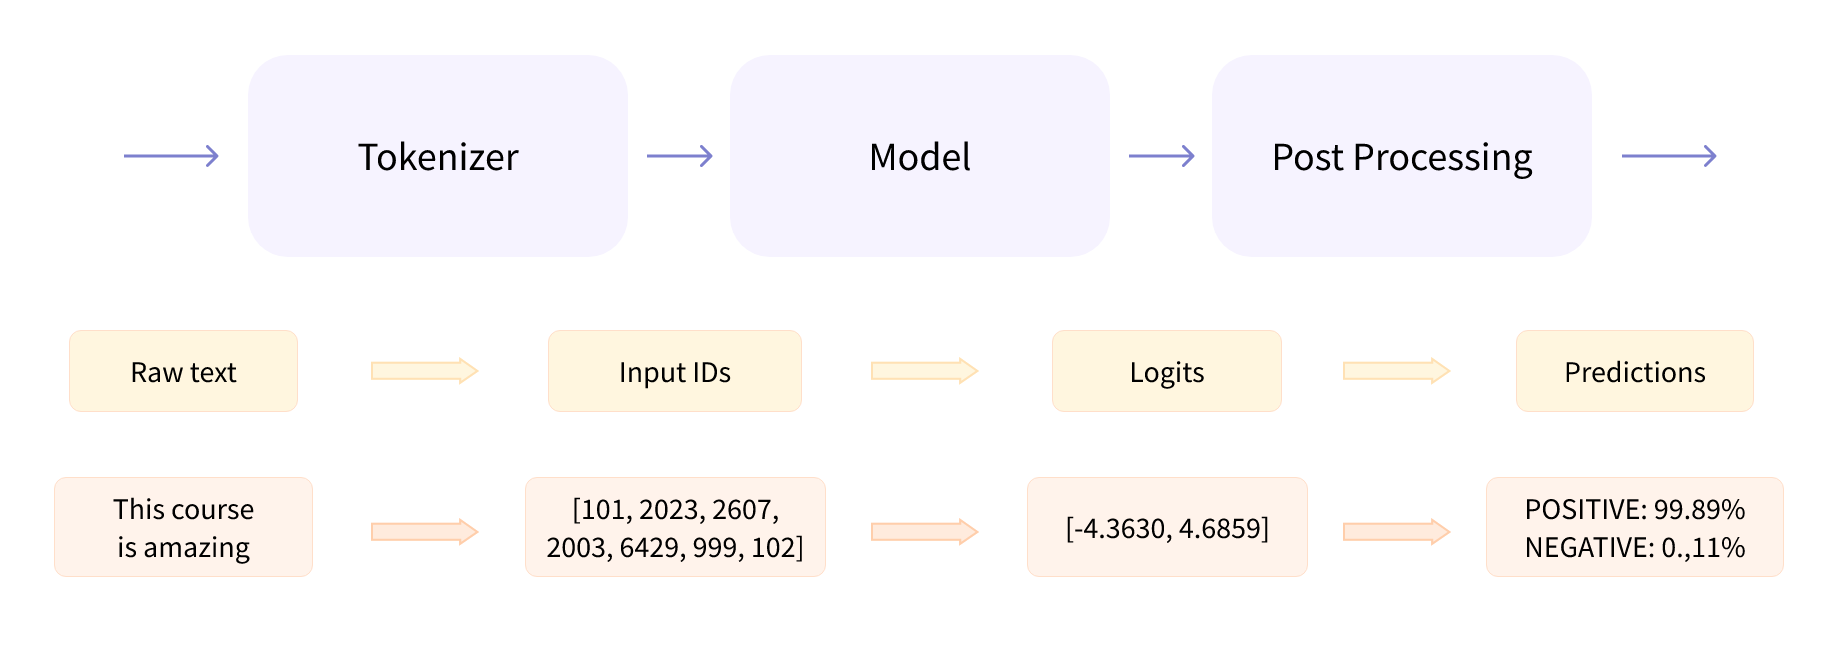




Let's understand each of these components one by one with a problem statement of **Classifying the input sentences into positive and negative sentiments**

### **Task 2.1 Tokenization**

The first step in the pipeline is tokenization. Tokenization is the process of breaking down raw text into individual units called tokens, which can be processed by machine learning models. The tokenizer takes raw text input and outputs tokens, input ids, attention mask, and token type ids.

When working with natural language processing tasks, it's often necessary to tokenize the text data by splitting it into individual words or subwords, and then encode those tokens into numerical representations that can be fed into a machine learning model.

However, different tasks and models may require different tokenization schemes or tokenizers which may not be aware of. This is where the `AutoTokenizer.from_pretrained()` method comes into the picture. It automatically identifies the relevant tokenization technique pertaining to a specific model using the model’s checkpoint name.

In [ ]:
# Import the required libraries
from transformers import AutoTokenizer

# Instantiate a BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Here, we import the BertTokenizer class from the transformers library and create an instance of the tokenizer by specifying the pre-trained model bert-base-uncased.


Once we have imported the tokenizer, the next job is to define the input sentence that our tokenizer should encode:


In [ ]:
# Define multiple sentences as a single list
input_sentences = [
    "I hate this movie",
    "This Course is helping me learn new and wonderful things.",
]

#### **Task 2.1.1: Input Encoding**
Once we have the tokenizer, we can use it to encode the input sentences. The tokenizer takes care of mapping the tokens to their corresponding IDs, adding special tokens such as `[CLS]` and `[SEP]` and producing the attention mask and token type ids.

But what are they?

Broadly we have to create the input tensors required for model inference. The input tensor consists of three components: **input_ids, attention_mask, and token_type_ids.**

1. **Input IDs:** These are the unique integer values assigned to each token in the input sentence by the tokenizer. Each token in the input sentence is mapped to a unique integer value.

2. **Attention Mask:** This tensor is used to indicate which tokens in the input sentence are actual tokens and which ones are padding tokens. The padding tokens are marked as 0 in the attention mask tensor, and the actual tokens are marked as 1.

3. **Token Type IDs:** This tensor is used when we are passing input multiple sentences as input to the model. In our case, we are passing only a single list sentence, so we don't need to use this tensor.

We will use the `call()` method of the model to perform the inference. The `call()` method takes the input tensors as input and returns the predicted class labels for each input sentence.

Let's create the input tensors using the tokenizer() method and the two input sentences we defined earlier:

In [ ]:
input_sentences = [
    "I hate this movie",
    "This Course is helping me learn new and wonderful things.",
]

In [ ]:
# Encode the input sentences using the tokenizer
# The tokenizer maps tokens to their corresponding IDs, adds special tokens such as [CLS] and [SEP],
# and produces the attention mask and token type ids

inputs = tokenizer(
    input_sentences,                            # list of input sentences
    add_special_tokens=True,                    # add special tokens
    max_length=12,                              # truncate to maximum length of 32 tokens
    padding=True,                               # Add padding to the tokens so that all inputs have same length
    truncation=True,                            # Truncate inputs to max length of the tokenizer
    return_tensors='tf'                         # return tensorflow tensors
)

print(inputs)

{'input_ids': <tf.Tensor: shape=(2, 12), dtype=int32, numpy=
array([[ 101, 1045, 5223, 2023, 3185,  102,    0,    0,    0,    0,    0,
           0],
       [ 101, 2023, 2607, 2003, 5094, 2033, 4553, 2047, 1998, 6919, 2477,
         102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 12), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}


In [ ]:
# Extract the input ids and attention mask from the encoded inputs
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

print(f"input_ids:\n{input_ids}")
print(f"attention_mask:\n{attention_mask}")

input_ids:
[[ 101 1045 5223 2023 3185  102    0    0    0    0    0    0]
 [ 101 2023 2607 2003 5094 2033 4553 2047 1998 6919 2477  102]]
attention_mask:
[[1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


The output is a dictionary with two keys, **"input_ids"** and **"attention_mask"**. These are the outputs of the tokenizer that we just applied to the input sentences.

* The output represents the tokenized version of the input sentence, where the  sentence has been converted into a sequence of integers that represent the corresponding tokens.

* The `[CLS]` token is added at the beginning of each input sentence and the`[SEP]` token is added at the end of each input sentence, to mark the beginning and end of the sequence. Here the id 101 represent `[CLS]`, wheras 102 represents the `[SEP]` token.


* The **"input_ids"** key contains a 2D Tensor of shape (2, 12), where the first dimension represents the number of samples/inputs passed and the second dimension represents the maximum length of tokens(max_length=12).

* The length of the first sentence after tokenisation is less than max_length, therefore the remaining values(6) are padded by 0s. For the second sentence, no padding is applied since it's length is more than 12.  

* The **"attention_mask"** is used to indicate which tokens in the input sequence are "real" tokens and which tokens are padding tokens.

NOTE: If `padding="longest"`, the tokenizer will **pad all input sequences to the length of the longest sequence** in the batch. For example, if the input batch has two sentences with lengths 8 and 12, the tokenizer will pad the first sentence with 4 [PAD] tokens at the end, so that its length is also 12.


Read [this](https://huggingface.co/docs/transformers/pad_truncation) documentation to understand more on padding & truncation

### **Task 2.2:Model Inference**

After tokenization, the encoded input is passed through the model to make predictions.

#### **Task 2.2.1: Model**
We will use the `TFAutoModelForSequenceClassification` class from the transformers library, which is a pre-trained model specifically designed for sequence classification tasks.

In [ ]:
# In order to get consistent results, we can set a random seed before calling the model.
# Import the required libraries
import random
import numpy as np
import tensorflow as tf

from transformers import TFAutoModelForSequenceClassification

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate a pre-trained BERT model for sequence classification
model = TFAutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.



We will use the call() method of the model to perform the inference. The call() method takes the input tensors as input and returns the predicted class labels for each input sentence.

In [ ]:
# Call the model with the input_ids and attention_mask tensors as inputs to get the output logits
logits = model(input_ids, attention_mask)[0]
print(logits)

tf.Tensor(
[[ 4.4376183 -3.5746415]
 [-4.3574057  4.6843343]], shape=(2, 2), dtype=float32)


By default, the model returns the output logits, which are the unnormalized scores for each label. These scores are then passed through the softmax function to get the probabilities for each label.

In [ ]:
# Convert the logits to probabilities using the softmax function
probs = tf.nn.softmax(logits, axis=1)
print(probs)

tf.Tensor(
[[9.9966872e-01 3.3126536e-04]
 [1.1835064e-04 9.9988163e-01]], shape=(2, 2), dtype=float32)


The code in above cell gives the probability that each statement in Positive or negative. The first row tells us 2 probabilities, where first value in first row is the possibility of the given statement being a negative statement and second value in first row gives the probability that the given statement is positive. Same is done for second statement in second row.

We can extract the predicted class labels as follows:

In [ ]:
# Get the predicted class labels by taking the argmax of the probabilities along axis 1
predicted_labels = tf.argmax(probs, axis=1)
print(predicted_labels)

tf.Tensor([0 1], shape=(2,), dtype=int64)


The code in above cell picks the higher probability for each statement. In row 1, the possibility is high for negative and in second row, the possibility is high for positive.

To display the predicted label for each sentence, we can simply use the argmax function to get the index of the maximum probability in the probs tensor.

In [ ]:
# Print the predicted labels for each sentence
for i, sentence in enumerate(input_sentences):
    label = "Positive" if predicted_labels[i] == 1 else "Negative"
    print(f"Sentence: {sentence}\nPredicted Sentiment: {label}\n")

Sentence: I hate this movie
Predicted Sentiment: Negative

Sentence: This Course is helping me learn new and wonderful things.
Predicted Sentiment: Positive

